# Breast Cancer Wisconsin (Diagnostic) Data Set

## Introduction

For our project, we wanted to focus on the health industry. We wanted to find a dataset where we could apply predictions to give a diagnosis to the patient. As we were browsing for datasets, we had to decide which disease we wanted to study. We decided to look at cancer, as cancer is a widely studied disease today. This motivated us to analyze the breast cancer dataset publicly available on Kaggle. We believe that our analysis of this dataset would be helpful to doctors and patients, who want to find out whether the cancer is benign or malignant. 

For our model, we decided to choose to use a classification/prediction model as our goal is to classify whether the cancer is benign or malignant. To do this, we ran different models including logistic regression, decision trees and random forests and then, based on the performance on the vailidation set, we picked the best one. After that, we evaluated our final model on the test set. Furthermore, we looked at the significance of our model parameters using confidence intervals and did a hypothesis test using a two-sample t-test to see whether if our results are significant enough by choosing a significance level of 5%. Based on our final model, we hope that our model can serve as a strong basis for predicting whether the cancer is benign or malignant based on its characteristics.

## Data Description

The raw data is from Kaggle, which can be found [here](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data). The data was given to us in a csv file with 569 observations, so it was hard to interpret. To better interpret the data, we converted the data into a pandas dataframe. Each row of the data represents a specific patient. 357 patients have malignant cancer and 212 have benign cancer. The dataset contains 33 columns with 31 features representing the tumor's characteristics. We treated the diagnosis column as our response variable. All of the features are quantitative (float64) except for the id column (int64) and the diagnosis ('M' or 'B').  To combat this issue, we One Hot Encoded the diagnosis to convert it to 1s and 0s, which would allow us to run our classification model. The diagnosis is read as follows: 0 for benign and 1 for malignant. We also dropped the last column as it was empty. Below is the cleaned dataset that we generated:

In [1]:
import pandas as pd
data = pd.read_csv('data/clean.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploratory Data Analysis

### Data Analysis

## Prediction

In our research, we wish to build a model that can identify whether the cancer is benign or malignant. To build a model with the best predictive power, we tried both parametric and nonparametric models, including Logistic Regression, Decision Tree, and Random Forest. Before develop models, we split our data into the training, validation, and test sets, and the breakdown is 68% for training, 17% for validation ,and 15% for testing.

After training models, we used validation data to obtain metrics that measure models' performance. We used the following metrics:

- Accuracy: The accuray of a model is the fraction of correct predictions: $\frac{\text{correct predictions}}{\text{total number of data points}}$

- Confusion Matrix: A confusion matrix is a table that is used to visualize the performance of a classification algorithm, with four elements: True Positive, True Negative, False Positve (Type I Error), False Negative (Type II Error).

- ROC Curve: ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). When we read ROC curves, we compare the AUC ROC curves. AUC stands for the area under an ROC curve, and it is a measure of the accuracy of a diagnostic test. AUC is the average true positive rate (average sensitivity) across all possible false positive rates. In general, higher AUC values indicate better test performance.

- Precision Recall Curve: The precision-recall curve is a graph with Precision values ($\frac{TP}{TP+FN}$) on the y-axis and Recall values ($\frac{TP}{TP+FP}$) on the x-axis. It shows the tradeoff between precision and recall for different threshold.

- F1 score: F1 score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

### Logistic Regression 

In this section, we will perform logistic regression analysis.

Description: Logistic Regression works by calculating posterior probabilies for the data by using the logistic function and based on those probablities it classifies the data point.Given below is the logistic function:

$$ s(x) = \frac{1}{1+ e^{-x}} $$

Limitations and Assumptions: An important thing to note about logistic regression is that it can only be used for binary classifiation and not multiclass classification. This is because it follows the rule that any point whose probability of being in a class is more than 50% is assigned to that class. If not, it is assigned to the other class. 

Preprocessing: For the preprocessing, we dropped the diagnosis column (since we don't want to see the labels) and the id column (since it is not a very predictive feature) to create our feature matrix. Then we evaluated the model using various metrics. The calculated metrics and the preprocessing can be found in the logistic_reg.ipynb. Here are the plots:

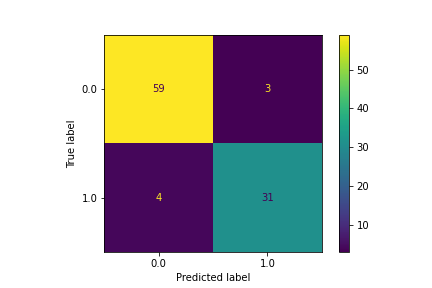

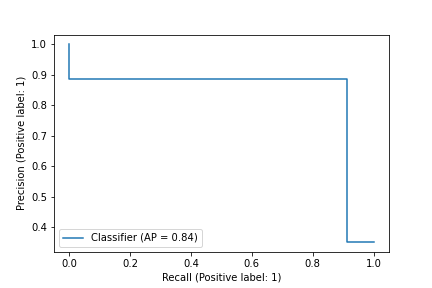

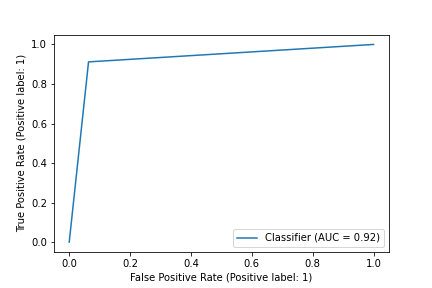

In [2]:
from PIL import Image
conf_image = Image.open('figures/confusion_matrix_logistic.png')
prec_recall_image = Image.open('figures/precision_recall_curve_logistic.png')
roc_curve_image = Image.open('figures/roc_curve_logistic.png')
display(conf_image)
display(prec_recall_image)
display(roc_curve_image)

Evaluation: The classifier seems to performing well with a very few false positive (falsely classifying cancer as malignant) and false negatives (falsely classfying the cancer as benign). In addition, the AUC of the classifier is 0.92, which means that the classifier is getting the correct answer 92% of the time.

### Decision Tree

The Decision tree algorithm is a supervised learning algorithm that continuously splits data points to form predictions. Every decision tree includes a root node, branches, and leaf nodes. The internal leaf nodes are decision points that describe various test cases whereas the branches represent the outcomes of those decisions. The very bottom nodes in a decision tree give prediction values to the data. A decision tree is an appropriate model for this data as it can be used to solve classification problems such as this one where we are trying to identify whether the cancer is benign or malignant.

The accuracy of the Decision Tree model is about 0.9381, and its F1 score is about 0.9143. The  confusion matrix, ROC curve, and Precision Recall Curve are below.

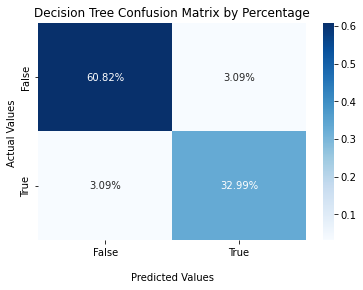

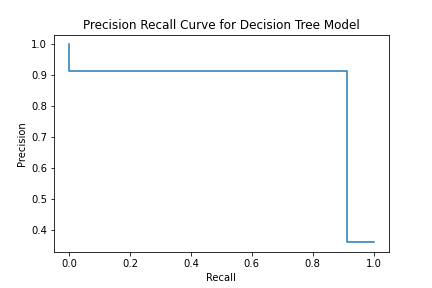

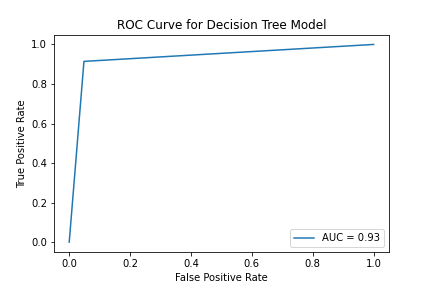

In [1]:
from PIL import Image
conf_image_dt = Image.open('figures/confusion_matrix_dt.png')
prec_recall_image_dt = Image.open('figures/precision_recall_curve_dt.png')
roc_curve_image_dt = Image.open('figures/roc_curve_dt.png')
display(conf_image_dt)
display(prec_recall_image_dt)
display(roc_curve_image_dt)

### Random Forest

The Random Forest algorithm builds on the decision tree algorithm by creating multiple decision trees. Each tree is then trained on a randomly drawn sample from the data. Each tree constructed does not consider every feature as a potential split point. The algorithm then averages the predictions across all the decision trees. Random Forest is an appropriate model for this data because like a decision tree, it can be used for classification problems. Furthermore, it can be a better fit than a single decision tree because random sampling and averaging across models help overcome overfitting and allows for more generalization.

The accuracy of the Random Forest model is about 0.9588, and its F1 score is about 0.9412. The  confusion matrix, ROC curve, and Precision Recall Curve are below.

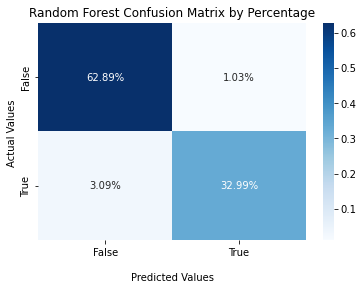

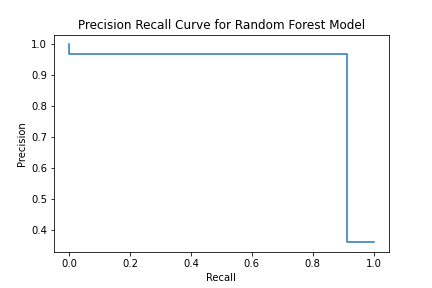

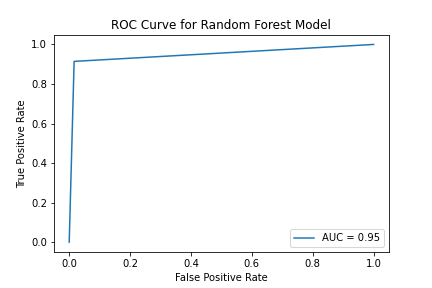

In [2]:
conf_image_rf = Image.open('figures/confusion_matrix_rf.png')
prec_recall_image_rf = Image.open('figures/precision_recall_curve_rf.png')
roc_curve_image_rf = Image.open('figures/roc_curve_rf.png')
display(conf_image_rf)
display(prec_recall_image_rf)
display(roc_curve_image_rf)

### Final Model

In [3]:
import pandas as pd
d = {
    'Metrics': ['Accuracy', 'FPR', 'FNR', 'TPR', 'TNR', 'AUC', 'F1 Score'],
    'Logistic Regression': ['0.9278', '0.0309', '0.0412', '0.3196', '0.6082', '0.92', '0.8986'],
    'Decision Tree': ['0.9381', '0.0309', '0.0309', '0.3299', '0.6082', '0.95', '0.9143'],
    'Random Forest': ['0.9588', '0.0103', '0.0309', '0.3299', '0.6289', '0.95', '0.9412']
}
d = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': ['0.9278', '0.9381', '0.9588'],
    'FPR': ['0.0309', '0.0309', '0.0103'],
    'FNR': ['0.0412', '0.0309', '0.0309'],
    'TPR': ['0.3196', '0.3299', '0.3299'],
    'TNR': ['0.6082', '0.6082', '0.6289'],
    'AUC': ['0.92', '0.93', '0.95'],
    'F1 Score': ['0.8986', '0.9143', '0.9412']
}
metrics_df = pd.DataFrame(data=d)
metrics_df

,Model,Accuracy,FPR,FNR,TPR,TNR,AUC,F1 Score
0,Logistic Regression,0.9278,0.0309,0.0412,0.3196,0.6082,0.92,0.8986
1,Decision Tree,0.9381,0.0309,0.0309,0.3299,0.6082,0.93,0.9143
2,Random Forest,0.9588,0.0103,0.0309,0.3299,0.6289,0.95,0.9412


Random Forest Model performs better than Logistic Regression and Decision Tree in validation set since it gets higher accuracy, higher TPR and TNR as well as lower FPR and FNR, higher AUC, and higher F1 Score. Therefore, we select Random Forest Model as our final model and use the test set to evaluate its performance. The performance of our final model is plotted below.

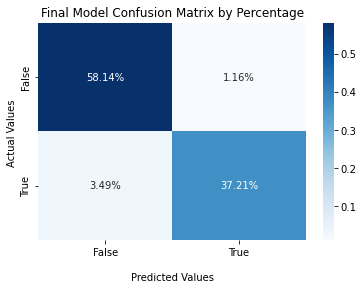

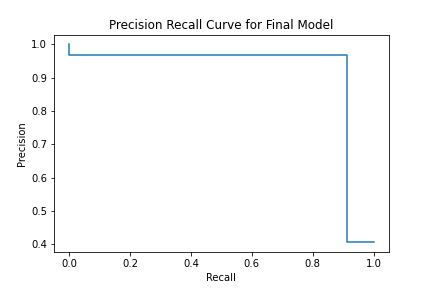

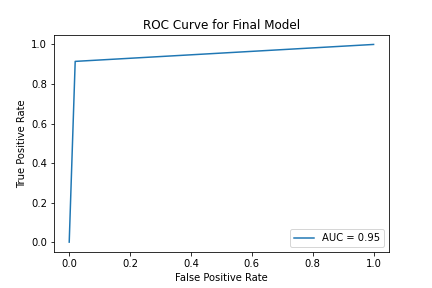

In [4]:
conf_image_final = Image.open('figures/confusion_matrix_final.png')
prec_recall_image_final = Image.open('figures/precision_recall_curve_final.png')
roc_curve_image_final = Image.open('figures/roc_curve_final.png')
display(conf_image_final)
display(prec_recall_image_final)
display(roc_curve_image_final)

The accuracy of final model is 0.9535, and the F1 score is 0.9412. Overall, we are able to build a prediction model that has high accuracy and balances precision and recall. One notable thing of our model is that it has a relatively higher False Negative Rate than False Positive Rate, which means it is more likely to identifiy a patient who actually has benign breast cancer as having malignant breast cancer. In future studies, we might focus on how to lower the FNR when building the predictive model.  

## Assess significance of features using LR

## Hypothesis testing

## Discussion & Conclusion

## Author Contributions

Kshitij Chauhan (TJ): Created the logistic_reg.ipynb notebook to conduct logistic regression analysis and tests in test_logistic_reg.py file to test the functions. Also did the introduction, data description and logistic regression sections of this notebook.

Jiaji Wu: created decision_tree_and_random_forest.ipynb and final_model_selection.ipynb to construct the decision tree and random forest and select the final model; contributed on the Prediction section in main.ipynb; added helper functions in modelmake.py and corresponding testing functions. 